<a href="https://colab.research.google.com/github/Igor-Belskiy/post-case/blob/main/%D0%9F%D0%BE%D1%87%D1%82%D0%B0_%D0%91%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка библиотек и исходных данных

In [ ]:
import pandas as pd
import numpy as np

import time
import os
import gdown     # Для загрузки файлов с гугл-диска
from google.colab import output

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from tensorflow.keras import utils   #Используем для to_categoricall

from tensorflow.keras.models import Sequential, Model # 
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten #
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop #



%matplotlib inline

In [ ]:
# Загружаем данные в колаб
# Для более быстрой загрузки данные сохранил на своём гугл-диске и запаковал
# При необходимости, здесь можно сменить источник данных

gdown.download('https://drive.google.com/uc?id=1-24jlxJk2rn5yK0qpzVtXkCeKdiJ8l0E', 'train_dataset_train.csv.gz', quiet=False)

gdown.download('https://drive.google.com/uc?id=1-F0_JQsFbApttOSiitcP9HwXD6-h-AYr', 'test_dataset_test.csv.gz', quiet=False)

!gunzip '/content/test_dataset_test.csv.gz'
!gunzip '/content/train_dataset_train.csv.gz'


Downloading...
From: https://drive.google.com/uc?id=1-24jlxJk2rn5yK0qpzVtXkCeKdiJ8l0E
To: /content/train_dataset_train.csv.gz
100%|██████████| 255M/255M [00:01<00:00, 145MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-F0_JQsFbApttOSiitcP9HwXD6-h-AYr
To: /content/test_dataset_test.csv.gz
100%|██████████| 170M/170M [00:01<00:00, 161MB/s]


In [ ]:
df = pd.read_csv('/content/train_dataset_train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:

df_test = pd.read_csv('/content/test_dataset_test.csv')

In [ ]:
# Загружаем предобработанный данные (простые категориальные данные)

gdown.download('https://drive.google.com/uc?id=1-QtP1zT9623Jm9oMe_EJqxOenRO-dKLe', 'train_simple_cat.npy.gz', quiet=False)

gdown.download('https://drive.google.com/uc?id=1-Q8bqHJpx8XZQMt0x9-niXp15Pz7xhgz', 'test_simple_cat.npy.gz', quiet=False)

!gunzip 'train_simple_cat.npy.gz'
!gunzip 'test_simple_cat.npy.gz'

Downloading...
From: https://drive.google.com/uc?id=1-QtP1zT9623Jm9oMe_EJqxOenRO-dKLe
To: /content/train_simple_cat.npy.gz
100%|██████████| 48.9M/48.9M [00:00<00:00, 135MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-Q8bqHJpx8XZQMt0x9-niXp15Pz7xhgz
To: /content/test_simple_cat.npy.gz
100%|██████████| 32.6M/32.6M [00:00<00:00, 130MB/s] 


In [ ]:
train_simple_cat = np.load('train_simple_cat.npy')

In [ ]:

test_simple_cat = np.load('test_simple_cat.npy')

In [ ]:
import gc

gc.collect()

254

In [ ]:
del test_simple_cat
del train_simple_cat
del df
del df_test

gc.collect()

329

Загружаем предобработанный ранее файл y_train/
Подготовка этого файла в разделе "Выход готовим методом OHE"

In [ ]:
# Загружаем ранее созданный y_train с диска

gdown.download('https://drive.google.com/uc?id=1Edg22ORHSNmLU2yOJwwi3tOMUByxkE2R', 'y_train.npy.gz', quiet=False)

!gunzip 'y_train.npy.gz'

y_train = np.load('y_train.npy')

Downloading...
From: https://drive.google.com/uc?id=1Edg22ORHSNmLU2yOJwwi3tOMUByxkE2R
To: /content/y_train.npy.gz
100%|██████████| 720k/720k [00:00<00:00, 105MB/s]


Если надо, также можно подгрузить файл с текстовым решением организаторов

In [ ]:
gdown.download('https://drive.google.com/uc?id=1TgGUWZ2HBA_86lEUK6rTgwvSZJq8v1yM', 'sample_solution.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1TgGUWZ2HBA_86lEUK6rTgwvSZJq8v1yM
To: /content/sample_solution.csv
100%|██████████| 39.6M/39.6M [00:00<00:00, 141MB/s]


'sample_solution.csv'

In [ ]:
df_sample_solution = pd.read_csv('/content/sample_solution.csv')

# Осматриваем данные

In [ ]:
df_sample_solution.head(5)

,id,label
0,7815282,0
1,8443555,0
2,6352559,0
3,4921420,0
4,1420440,0


In [ ]:
df_sample_solution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   id      int64
 1   label   int64
dtypes: int64(2)
memory usage: 61.0 MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   id                             int64  
 2   oper_type + oper_attr          object 
 3   index_oper                     object 
 4   type                           object 
 5   priority                       float64
 6   is_privatecategory             object 
 7   class                          float64
 8   is_in_yandex                   object 
 9   is_return                      object 
 10  weight                         float64
 11  mailtype                       float64
 12  mailctg                        float64
 13  mailrank                       float64
 14  directctg                      float64
 15  transport_pay                  float64
 16  postmark                       float64
 17  name_mfi                       object 
 18  we

In [ ]:
df['mailrank'].head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: mailrank, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 30 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   id                             int64  
 2   oper_type + oper_attr          object 
 3   index_oper                     object 
 4   type                           object 
 5   priority                       float64
 6   is_privatecategory             object 
 7   class                          float64
 8   is_in_yandex                   object 
 9   is_return                      object 
 10  weight                         float64
 11  mailtype                       float64
 12  mailctg                        float64
 13  mailrank                       float64
 14  directctg                      float64
 15  transport_pay                  float64
 16  postmark                       float64
 17  name_mfi                       object 
 18  we

In [ ]:
df.nunique()

Unnamed: 0                       6000000
id                               6000000
oper_type + oper_attr                109
index_oper                         38661
type                                  20
priority                               4
is_privatecategory                     3
class                                  6
is_in_yandex                           3
is_return                              2
weight                              2809
mailtype                               9
mailctg                                5
mailrank                               1
directctg                              3
transport_pay                      10412
postmark                               6
name_mfi                          212936
weight_mfi                          2070
price_mfi                           6595
dist_qty_oper_login_1                165
total_qty_oper_login_1             18377
total_qty_oper_login_0              9351
total_qty_over_index_and_type      20097
total_qty_over_i

In [ ]:
df_test.nunique()

Unnamed: 0                       4000000
id                               4000000
oper_type + oper_attr                102
index_oper                         35589
type                                  20
priority                               4
is_privatecategory                     3
class                                  6
is_in_yandex                           3
is_return                              2
weight                              2804
mailtype                               7
mailctg                                5
mailrank                               1
directctg                              3
transport_pay                      10358
postmark                               6
name_mfi                          205458
weight_mfi                          2069
price_mfi                           6529
dist_qty_oper_login_1                164
total_qty_oper_login_1             18268
total_qty_oper_login_0              9319
total_qty_over_index_and_type      19977
total_qty_over_i

In [ ]:
for x in df.columns :
  print('Столбец: ', x)
  print(df[x].value_counts())
  print('\n')

Столбец:  Unnamed: 0
0          1
4000007    1
4000005    1
4000004    1
4000003    1
          ..
1999998    1
1999997    1
1999996    1
1999995    1
5999999    1
Name: Unnamed: 0, Length: 6000000, dtype: int64


Столбец:  id
6818780    1
1236699    1
4090073    1
7722817    1
3414179    1
          ..
2573822    1
654869     1
1616887    1
1384821    1
6423388    1
Name: id, Length: 6000000, dtype: int64


Столбец:  oper_type + oper_attr
1020_-1    693154
1022_-1    656597
1019_-1    413710
8_0        402877
1_-1       359402
            ...  
2_2             1
12_6            1
2_11            1
2_10            1
1009_-1         1
Name: oper_type + oper_attr, Length: 109, dtype: int64


Столбец:  index_oper
102976      938416
102976.0    661191
102971      476859
102971.0    341402
620984       80811
             ...  
347566.0         1
397724           1
353710.0         1
668412           1
164553.0         1
Name: index_oper, Length: 38661, dtype: int64


Столбец:  type
Цех     

# Функция обработки входящих данных

Планируется несколько функций, для обработки разных видов данных.

In [ ]:
#Находим столбцы, в которых количество уникальных значений совпадает в обучающем и тестовом наборах данных

s = df.drop('label', axis=1).nunique() == df_test.nunique()

s 

Unnamed: 0                       False
id                               False
oper_type + oper_attr            False
index_oper                       False
type                              True
priority                          True
is_privatecategory                True
class                             True
is_in_yandex                      True
is_return                         True
weight                           False
mailtype                         False
mailctg                           True
mailrank                          True
directctg                         True
transport_pay                    False
postmark                          True
name_mfi                         False
weight_mfi                       False
price_mfi                        False
dist_qty_oper_login_1            False
total_qty_oper_login_1           False
total_qty_oper_login_0           False
total_qty_over_index_and_type    False
total_qty_over_index             False
is_wrong_sndr_name       

In [ ]:
# Фильтруем серию по значению True, остальные значения удаляем и берем индекс (так как в нём названия столбцов)
# Это и будет список столбцов, у которых совпало количество уникальных значений в обучающем и тестовом дата-сете

simple_categorical_columns= list(s.where(s==True).dropna().index)

simple_categorical_columns     # Это список с именами столбцов даннных, которые мы считаем простыми категориальными

['type',
 'priority',
 'is_privatecategory',
 'class',
 'is_in_yandex',
 'is_return',
 'mailctg',
 'mailrank',
 'directctg',
 'postmark',
 'is_wrong_sndr_name',
 'is_wrong_rcpn_name',
 'is_wrong_phone_number',
 'is_wrong_address']

In [ ]:
df[simple_categorical_columns].nunique()

type                     20
priority                  4
is_privatecategory        3
class                     6
is_in_yandex              3
is_return                 2
mailctg                   5
mailrank                  1
directctg                 3
postmark                  6
is_wrong_sndr_name        2
is_wrong_rcpn_name        2
is_wrong_phone_number     2
is_wrong_address          2
dtype: int64

In [ ]:
# Проверяем здесь, что сами виды уникальных значении в отоборанных столбцах
# в обучающей и тестовой выборке тоже совпадают

for x in simple_categorical_columns:

    print('Столбец:  ', x, '  Количество уникальных значений:  ', df[x].nunique(),'\n')

    print('Уникальные значения в df(тренировочные данные):  ', df[x].unique(),'\n')
    print('Уникальные значения в df_test(тестовые данные):  ', df_test[x].unique(),'\n')

    print('--------------------------------------------------\n')

Столбец:   type   Количество уникальных значений:   20 

Уникальные значения в df(тренировочные данные):   ['Участок' 'ММПО' 'Цех' 'П' 'ТИ' 'ГОПС' 'МСЦ' 'СОПС' 'АО' 'МРП' 'СЦ' 'МСО'
 'ОПП' 'АОПП' 'ПЕРЕДВИЖНОЕ ОС' 'ОП' '0' 'ППС' 'УМСЦ' 'УКД'] 

Уникальные значения в df_test(тестовые данные):   ['ММПО' 'ГОПС' 'ТИ' 'Цех' 'МСЦ' 'Участок' 'П' 'СОПС' 'СЦ' 'ОПП' 'АОПП'
 'МСО' 'МРП' 'ОП' '0' 'АО' 'ППС' 'УМСЦ' 'ПЕРЕДВИЖНОЕ ОС' 'УКД'] 

--------------------------------------------------

Столбец:   priority   Количество уникальных значений:   4 

Уникальные значения в df(тренировочные данные):   [7503. 7504. 7506.    0.] 

Уникальные значения в df_test(тестовые данные):   [7503. 7506. 7504.    0.] 

--------------------------------------------------

Столбец:   is_privatecategory   Количество уникальных значений:   3 

Уникальные значения в df(тренировочные данные):   ['N' 'Y' '0'] 

Уникальные значения в df_test(тестовые данные):   ['N' 'Y' '0'] 

-----------------------------------------------

In [ ]:
# Удаляем из списка для обработки столбец 'mailrank' 
# так там только один вид значений, а значит столбец не информативен

simple_categorical_columns.remove('mailrank')

simple_categorical_columns

['type',
 'priority',
 'is_privatecategory',
 'class',
 'is_in_yandex',
 'is_return',
 'mailctg',
 'directctg',
 'postmark',
 'is_wrong_sndr_name',
 'is_wrong_rcpn_name',
 'is_wrong_phone_number',
 'is_wrong_address']

In [ ]:
# Так же создаём переменную для хранения списка бесполезных столбоцов и записываем туда 'mailrank'

useless_columns = list(['mailrank'])

useless_columns

['mailrank']

In [ ]:
# Cобираем словарь значений для простой предобработки в формат OHE

dict_simple_categorical_columns = {}

for x in simple_categorical_columns:
    # dict_simple_categorical_columns[x] = df[x].unique()                # Версия чтобы список был в формате numpy
    dict_simple_categorical_columns[x] = list( df[x].unique() )

dict_simple_categorical_columns

{'type': ['Участок',
  'ММПО',
  'Цех',
  'П',
  'ТИ',
  'ГОПС',
  'МСЦ',
  'СОПС',
  'АО',
  'МРП',
  'СЦ',
  'МСО',
  'ОПП',
  'АОПП',
  'ПЕРЕДВИЖНОЕ ОС',
  'ОП',
  '0',
  'ППС',
  'УМСЦ',
  'УКД'],
 'priority': [7503.0, 7504.0, 7506.0, 0.0],
 'is_privatecategory': ['N', 'Y', '0'],
 'class': [0.0, 3.0, 1.0, 2.0, 4.0, 5.0],
 'is_in_yandex': ['Y', 'N', '0'],
 'is_return': ['N', 'Y'],
 'mailctg': [1.0, 0.0, -1.0, 3.0, 5.0],
 'directctg': [2.0, 1.0, 0.0],
 'postmark': [0.0, 512.0, 1024.0, 8.0, 256.0, 1.0],
 'is_wrong_sndr_name': [0, 1],
 'is_wrong_rcpn_name': [0, 1],
 'is_wrong_phone_number': [0, 1],
 'is_wrong_address': [0, 1]}

In [ ]:
# Сначала обрабатываем столбцы входящих данных с простыми категориальными данными
# То есть с данным, количество и состав категорий полностью совпадает 
# в обучающем и тестовом дата-фрейме.

def simple_categorical_data (df, start_num, stop_num, simple_categorical_columns, dict_simple_categorical_columns):

    simple_OHE = []
    len_df = stop_num - start_num

    t0 = time.time()
    t_clear = t0

    for y_line in range(start_num, stop_num):      # Для каждой стоки датасета обрабатываем столбцы из списка simple_categorical_columns

        t1 = time.time()

        if (t1 - t_clear) > 5 :  
            output.clear()                   
            print('Готово: ', y_line - start_num )
            print('Это ', round((y_line - start_num) / len_df * 100, 4), ' % от', len_df,' строк')
            print('Времени прошло с начала: ', round(t1 - t0), ' секунд')
            t_clear = t1

        one_line = np.empty( shape=0 )
        
        for x_col in simple_categorical_columns:

            z = df.iloc[y_line][x_col]     # Значение, которое кодируем в этой итерации 

            # n = np.where(dict_simple_categorical_columns[x_col] == z)[0][0]    # Строка для получения индекса, если в словаре список значения в формате numpy
            # n = np.argwhere(dict_simple_categorical_columns[x_col] == z)[0][0] # Ещё один способ для Numpy массивов.
            n = dict_simple_categorical_columns[x_col].index(z)     # Получаем индекс текущего значения в полученном словаре (версия, если в словаре значения в формате list)

            d = len(dict_simple_categorical_columns[x_col])      # Длинну словаря получаем для текущего столбца

            ohe = utils.to_categorical( n, d )          # Переводим в формат One Hot Encoding

            one_line = np.append( one_line, ohe)        # Добавляем значение текущего столбца к строке

        simple_OHE.append(one_line)       # Добавляем полученную стоку в список    

    simple_OHE = np.array(simple_OHE)     # Выход сразу делаем в формате Numpy 

    print('\nОбработка завершена. Готово 100%')
    print('Времени затрачено на обработку: ', round(time.time() - t0), ' секунд')

    return simple_OHE

In [ ]:
# Тестовый запуск функции обработки простых категориальных данных

k = simple_categorical_data (df, 0, 6000, simple_categorical_columns, dict_simple_categorical_columns)

Готово:  4201
Это  70.0167  % от 6000  строк
Времени прошло с начала:  10  секунд

Обработка завершена. Готово 100%
Времени затрачено на обработку:  14  секунд


## Пошаговая обработка датасета с сохранением копии файлов на гугл-диск
(понадобилась потому, что при длительной обработке колаб отваливался)

In [ ]:
lines_in_file = 1000000           # Задаём количество строк, которые будем обрабатывать, перед сохранением в файл

start_line = 0             # Первая строка с которой будем обрабатывать
end_line = df_test.shape[0]     # До куда будем обрабатывать массив

cur_start = start_line                  # Стартовая пременная которая будет использоваться в цикле
 

while cur_start < end_line:

    cur_end = cur_start + lines_in_file     # Задаём конечную точку, до какой строки будет обрабатываться массив в этой итерации

    if cur_end > end_line :
        cur_end = end_line                  # Если конечная точка вышла за пределы, то устанавливаем её как размер массива
    
    print('Сейчас обрабатываются строки с ',cur_start+1, ' по ', cur_end)

    k = simple_categorical_data (df_test, cur_start, cur_end, simple_categorical_columns, dict_simple_categorical_columns)   # Запускаем обработку

    file_name = 'test_simple_cat_'+str(round(cur_start+1))+'_'+str(round(cur_end))           # Формируем имя файла
 
    np.save(file_name, k)                                                               # Сохраняем результаты обработки в файл

    os.system('gzip ' + file_name + '.npy')       # Архивируем файл
    
    os.system('cp ' + file_name + '.npy.gz /content/drive/MyDrive/TemporaryData/' + file_name + '.npy.gz')      # Делаем копию на гугл-драйв

    print('\n--------------------------------------------------------------')

    cur_start += lines_in_file       

Готово:  999705
Это  99.9705  % от 1000000  строк
Времени прошло с начала:  2381  секунд

Обработка завершена. Готово 100%
Времени затрачено на обработку:  2384  секунд

--------------------------------------------------------------


Ниже распаковываем файлы после обработки, объединяем в один и сохраняем уже единым куском.

Сначала обрабатываем тестовый дата сет

In [ ]:
# Распаковываем файлы

os.system('gunzip test_simple_cat_1000001_2000000.npy.gz test_simple_cat_1_1000000.npy.gz test_simple_cat_2000001_3000000.npy.gz test_simple_cat_3000001_4000000.npy.gz')


0

In [ ]:
# Загружаем и объединяем данные в один массив

test_simple_cat = np.concatenate((np.load('/content/test_simple_cat_1_1000000.npy'),
                                  np.load('/content/test_simple_cat_1000001_2000000.npy'),
                                  np.load('/content/test_simple_cat_2000001_3000000.npy'), 
                                  np.load('/content/test_simple_cat_3000001_4000000.npy')))

print(test_simple_cat.shape)

np.save('test_simple_cat', test_simple_cat)

os.system('gzip -k -v test_simple_cat.npy')

os.system('cp test_simple_cat.npy.gz /content/drive/MyDrive/TemporaryData/test_simple_cat.npy.gz')

(4000000, 60)


0

Здесь объединяем обучающий дата-сет

In [ ]:
# Копируем файлы с гугл-диска в колаб

os.system('cp /content/drive/MyDrive/TemporaryData/train_simple_cat_1_1000000.npy.gz       train_simple_cat_1_1000000.npy.gz')
os.system('cp /content/drive/MyDrive/TemporaryData/train_simple_cat_1000001_2000000.npy.gz train_simple_cat_1000001_2000000.npy.gz')
os.system('cp /content/drive/MyDrive/TemporaryData/train_simple_cat_2000001_3000000.npy.gz train_simple_cat_2000001_3000000.npy.gz')
os.system('cp /content/drive/MyDrive/TemporaryData/train_simple_cat_3000001_4000000.npy.gz train_simple_cat_3000001_4000000.npy.gz')
os.system('cp /content/drive/MyDrive/TemporaryData/train_simple_cat_4000001_5000000.npy.gz train_simple_cat_4000001_5000000.npy.gz')
os.system('cp /content/drive/MyDrive/TemporaryData/train_simple_cat_5000001_6000000.npy.gz train_simple_cat_5000001_6000000.npy.gz')

0

In [ ]:
# Распаковываем файлы

os.system('gunzip train_simple_cat_1_1000000.npy.gz')
os.system('gunzip train_simple_cat_1000001_2000000.npy.gz')
os.system('gunzip train_simple_cat_2000001_3000000.npy.gz')
os.system('gunzip train_simple_cat_3000001_4000000.npy.gz')
os.system('gunzip train_simple_cat_4000001_5000000.npy.gz')
os.system('gunzip train_simple_cat_5000001_6000000.npy.gz')

0

In [ ]:
# Объединяем данные в один массив и сохраняем копию на гугл-диске

train_simple_cat = np.concatenate((np.load('/content/train_simple_cat_1_1000000.npy'),
                                   np.load('/content/train_simple_cat_1000001_2000000.npy'),
                                   np.load('/content/train_simple_cat_2000001_3000000.npy'), 
                                   np.load('/content/train_simple_cat_3000001_4000000.npy'),
                                   np.load('/content/train_simple_cat_4000001_5000000.npy'),
                                   np.load('/content/train_simple_cat_5000001_6000000.npy') ))

print(train_simple_cat.shape)

np.save('train_simple_cat', train_simple_cat)

os.system('gzip -k -v train_simple_cat.npy')

os.system('cp train_simple_cat.npy.gz /content/drive/MyDrive/TemporaryData/train_simple_cat.npy.gz')

(6000000, 60)


0

# Выход готовим методом OHE

Вместо одного столбца на выход, делаем два.

Легенда данных:
- если на выходе должен быть "0" -- единичка получается в первом значении.
- если на выходе должно быть "1" -- единичка получается во втором значении.

In [ ]:
df['label'].unique()

array([0, 1])

In [ ]:
s2 = np.array(df['label'], dtype='float')
s2

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
s1 = np.array(s2 != 1, dtype = 'float')
s1

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
s1 = s1.reshape(s1.shape[0], 1)   # Меняем форму данных со строки на столбец.
s1

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
s2 = s2.reshape(s2.shape[0], 1)
s2

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
y_train = np.concatenate((s1,s2), axis = 1)    # Объединяем столбцы для получения итогового выходного массива
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
 # Для будущей загрузки, в целях экономии памяти, сохраняем на диск

np.save('y_train', y_train)   

!gzip 'y_train.npy'

os.system('cp y_train.npy.gz /content/drive/MyDrive/TemporaryData/y_train.npy.gz')

0

In [ ]:
y_train.shape

(6000000, 2)

# Делаем первую модель, на вход подаём только простые категориальные данные в предобработанной форме (формат One Hot Encoding)

In [ ]:
model = Sequential()

model.add(Dense(60, activation='relu'))
model.add(Dense(150, activation='tanh'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='sigmoid'))


In [ ]:

model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])

Epoch 1/10
4200/4200 - 13s - loss: 0.0268 - mae: 0.0599 - val_loss: 0.0248 - val_mae: 0.0507 - 13s/epoch - 3ms/step
Epoch 2/10
4200/4200 - 13s - loss: 0.0246 - mae: 0.0496 - val_loss: 0.0247 - val_mae: 0.0501 - 13s/epoch - 3ms/step
Epoch 3/10
4200/4200 - 13s - loss: 0.0246 - mae: 0.0492 - val_loss: 0.0247 - val_mae: 0.0499 - 13s/epoch - 3ms/step
Epoch 4/10
4200/4200 - 13s - loss: 0.0246 - mae: 0.0490 - val_loss: 0.0247 - val_mae: 0.0499 - 13s/epoch - 3ms/step
Epoch 5/10
4200/4200 - 13s - loss: 0.0246 - mae: 0.0490 - val_loss: 0.0247 - val_mae: 0.0488 - 13s/epoch - 3ms/step
Epoch 6/10
4200/4200 - 11s - loss: 0.0246 - mae: 0.0490 - val_loss: 0.0247 - val_mae: 0.0504 - 11s/epoch - 3ms/step
Epoch 7/10
4200/4200 - 13s - loss: 0.0246 - mae: 0.0490 - val_loss: 0.0247 - val_mae: 0.0495 - 13s/epoch - 3ms/step
Epoch 8/10
4200/4200 - 13s - loss: 0.0246 - mae: 0.0490 - val_loss: 0.0247 - val_mae: 0.0500 - 13s/epoch - 3ms/step
Epoch 9/10
4200/4200 - 13s - loss: 0.0246 - mae: 0.0491 - val_loss: 0.02

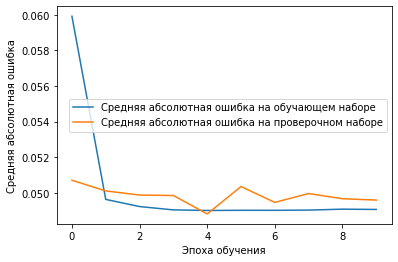

In [ ]:
history = model.fit(train_simple_cat, 
                    y_train, 
                    epochs=10, 
                    batch_size=1000,
                    validation_split=0.3, 
                    verbose=2)

plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

# Делаем предикт по тестовым данных и готовим выход для загрузки на платформу

In [ ]:
pred = model.predict(test_simple_cat)

In [ ]:
test_simple_cat.shape

(4000000, 60)

In [ ]:
pred.shape

(4000000, 2)

In [ ]:
pred[0]

array([0.9700844 , 0.02967063], dtype=float32)

In [ ]:
r = np.array( pred.T[0] < pred.T[1], dtype = 'int64')

In [ ]:
r.shape

(4000000,)

In [ ]:
df_sample_solution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   id      int64
 1   label   int64
dtypes: int64(2)
memory usage: 61.0 MB


In [ ]:
df_result = df_sample_solution

In [ ]:
df_result['label'] = r

In [ ]:
df_result['label'].value_counts()

0    3999638
1        362
Name: label, dtype: int64

In [ ]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   id      int64
 1   label   int64
dtypes: int64(2)
memory usage: 61.0 MB


In [ ]:
df_result.to_csv("simple_can_1.csv",sep=",", index=False, line_terminator='\n')